# Intro

It's the last time we meet in class for exercises! And to celebrate this mile-stone, we will finally combine what we have learnt so far about our network and the text related to it to understand the communities of BotW characters!

* We'll start with looking at communities and their words in two exercises
  - Part A: First we finish up the work on TF-IDF from last week but this time on communities
  - Part B: Secton we'll try  something new and study the topics related characters and communities
* In the latter half of the exercises (Part C), we play around with sentiment analysis - trying to see if we can find differences between the communities.

**Data to use:** Part A and B require to start with the ZeldaWiki pages of characters. You should use the output you saved from Week 7 Exercise 1!

# Part A: Communities TF-IDF word-clouds


We continue where we left off last time, so the aim of this part is to create community wordclouds based on TF-IDF. 

The aim is to understand which words are important for each community. And now that you're TF-IDF experts, we're going to use the code you wrote from last week. 

Let's start by creating $N_C$ documents, where $N_C$ is the number of communities you have found in Week 7 exercise 7. 

_Exercise 1_:

> * Now that we have the communities, let's start by calculating a the TF list for each community (use the same code you've written in ex. 7). Find the top 5 terms within each community. 
> * Next, calculate IDF for every word in every list (again by using the code from ex. 7). 
> * We're now ready to calculate TF-IDFs. Do that for each community. 
>   * List the 5 top words for each community accourding to TF-IDF. Are these words more descriptive of the community than just the TF? Justify your answer.
> * Create a wordcloud for each community. Do the wordclouds with TC-IDF (you can also use TF-IDF but need to re-normalize) lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

# Part B - Topic Modeling

Now that we have characterized each community with the most important words (according to TF-IDF), let's explore whether we can distinguish them by the topics of their characters' page. 

To do this we need to learn about topic modeling, a technique to extract the hidden topics from large volumes of text and Latent Dirichlet Allocation(LDA), a popular algorithm for topic modeling. 

> **Video Lecture**: Introduction to Topic Modeling with LDA

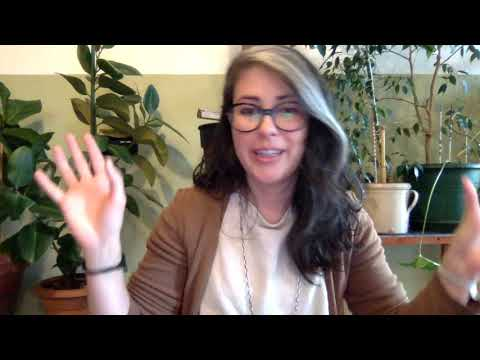

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("u-avnKI3oXU",width=800, height=450)

> **Optional Reading**: For more information on how LDA works and is implemented, you can refer to [Latent Dirichlet Allocation](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)

Now to the exercise! We want to extract the topics of the ZeldaWiki, to see whether we can further characterize the communities through the topics of their characters. Follow the steps below for success.

_Setup:_ LDA and gensim
> **Install and import**
>  * LDA has an excellent implementation in the [Python’s Gensim package](https://radimrehurek.com/gensim/), which you can isntall via `pip install --upgrade gensim`
>  * Have a look at the [documentation of Gensim](https://radimrehurek.com/gensim/auto_examples/index.html#documentation) and check that you correctly installed gensim by typing `import gensim` in your notebook.
>  * We will also need `import gensim.corpora as corpora` and `from gensim.models import CoherenceModel` to prepare the input and tune our model respectively.
>
> **Input** The two main inputs to the LDA algorithm are a dictionary `id2word` mapping each word to an index and the corpus:
> * First create a list of lists containing the preprocessed text of each character's page (you should have a list per character).
>    * *Optional:* I found better topics by re-running the data preprocessing (Week 7 Ex. 1) and adding a step to compute bigrams. You can find an example to follow in the [documentation](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py)
> * Second, build the dictionary `id2word` by using `corpora.Dictionary(YOUR_LIST_OF_LISTS)`
> * Finally, build your corpus by mapping the words in `YOUR_LIST_OF_LISTS` as follows `id2word.doc2bow(PAGE)` (here page is one entry of `YOUR_LIST_OF_LISTS`)
> 

_Exercise 2:_ LDA model and the ZeldaWiki.

> **Number of Topics** Topic coherence is a measure to judge how good a given topic model is. Do as follows:
> 
> * You can run the LDA model `gensim.models.LdaMulticore()` with input `id2word` and your `corpus`. As we do not expect many topics per document (i.e. in each character page) we will set a low value of alpha (e.g. `alpha=0.3`).
> * Now build many LDA models with different values of number of topics $N_t$ and plot the coherence score.
> * Pick the $N_t$ that gives the highest coherence value. How many topics did you find? What is the coherence score corresponding to the chosen model?
>
> **Results**
> 
> * Print the top 10 keywords and their importance for each topic by using `show_topics()` and interpret the topics you have found. Describe in general what they are about and whether they are different from each other.
> * We now want to find the association between characters of the same community and their topics:
>    * Get the association between your documents (each character's page) and the topics via `get_document_topics()`.
>    * Group the values you have obtained by averaging over each community and topic, i.e. for each character in a community $c$ find the average of their score over the same topic $t$. The result should be in the form of a matrix $M\in\mathbb{R}^{N_c\times N_t}$, with communities on rows and topics on columns.
>    * Create a `heatmap` of $M$ and describe your result. Are communities characterized by different topics? What are the communities that discuss different topics than other? Did you expect this result?
> * *Optional* You can rerun your code on single communities instead to find intra-community topics (similar to what we have done with TF-IDF). Try it out with the 3 biggest communities!
>

_Exercise 3:_ LDA topics visualization.

> **Visualization** We can examine the topics we previously found and their associated keywords with [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/index.html), an interactive tool designed to work well with jupyter notebooks.
>
> * Use `pip install pyldavis` to install the package and type `pyLDAvis.enable_notebook()` in your notebook.
> * Now visualize your results with `pyLDAvis.gensim_models.prepare`. Describe the meaning of the visualization. What do the "bubbles" on the left plot represent? And, what is the meaning of the bars on the right plot? 
>    * Which one is the most prevalent topic? Report the 5 most relevant terms.
>    * Are there overlapping topics? What do they describe in general? Report their 5 most relevant terms.

# Part C - Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the ZeldaWiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



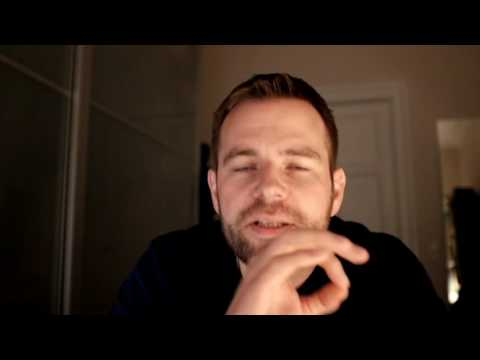

In [5]:
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

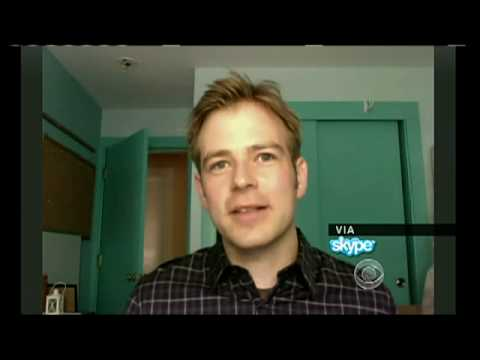

In [4]:
# There's also this one from 2010
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


_Exercise_ 4: Dictionary-based sentiment within the communities data.
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * We need a list of tokens as an input. We can use the preprocessed characters pages, however, Wiki pages are written without a clear sentiment. Thus, I have put together for you a dataset of characters' [dialogue in BotW](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/CharactersDialogue.json). The file contains a dictionary, whose keys are characters names and whose values are lists containing sentences said by a character in the game.
>    * **Note** Not all characters in the network have data (especially enemies and bosses). Thus, we will consider just communities with nodes having some dialogue in the following.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens. To get the list of tokens follow these 3 steps: lemmatize, set to lower case, and tokenize the sentences. 
> * Iterate over the nodes in your network, tokenize each sentence, and calculate the average sentiment of every character. Now you have sentiment as a new nodal property.
> * Remember histograms? Create a histogram of all character's associated dialogue-sentiments.
> * What are the 10 characters with happiest and saddest pages?
> * Now we average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Create a bar plot showing the average sentiment of each community (Optional: add error-bars using the standard deviation).
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities? 
>   - what are the three saddest communities?
>   - Do these results confirm what you can learn about each community by skimming the wikipedia pages?

Calculating sentiment takes a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

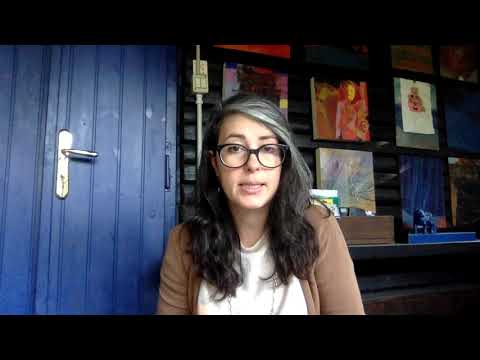

In [2]:
YouTubeVideo("Pgxbnfi93Jk",width=800, height=450)

We will now explore another method for sentiment analysis, called VADER, which uses both dictionary-based methods and rule-based methods. If you are interested in finding out more, you can find more material in the [original article](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf).

_Exercise 5_: (dictionary & rule)-based sentiment within the communities data.

> * Download the VADER lexicon dictionary from [here](https://raw.githubusercontent.com/cjhutto/vaderSentiment/master/vaderSentiment/vader_lexicon.txt). Read the description of the VADER lexicon in the README file of [VADER Github repo](https://github.com/cjhutto/vaderSentiment). How was the dictionary created?
> * Explore the VADER lexicon data.
>    * What are the top 10 words by polarity. And the bottom 10? Does this surprise you?
>    * Plot the distribution of polarity according to the VADER Lexicon data. What are the differences compared to the labMT data? Is it to be expected?
> * Install the VADER library using `pip install vaderSentiment`.
> * Go through the example sentences in the [vaderSentiment documentation page](https://github.com/cjhutto/vaderSentiment#code-examples) (Section Code Examples). Compute the compund polarity for each sentence.
> * Try VADER on your own sentences. Can you find a sentence where VADER gets wrong (the polarity has opposite sign compared to what one would expect)? You can have a look at VADER set of rules in the paper linked above.

_Exercise 6_: VADER and BotW Sentiment

> * Now use the BotW sentences from Exercise 4. Apply VADER to each individual sentence (i.e. list of tokens). Then compute the average polarity for each character. (**hint** remember that now it is important to keep punctuation, ALL-CAPS words, etc.)
>    * What are the 10 characters with happiest and saddest pages according to VADER?
> * Aggregate by community and compute the average community compund polarity. Create a bar plot showing the average compound polarity of each community and add error-bars using the standard deviation. 
>   - Name each community by its three most connected characters. 
>   - What are the three happiest communities according to VADER? 
>   - what are the three saddest communities according to VADER?
> * Do the bar plot and results from the previous step look different to the one you obtained in Exercise 4? How do you explain it?
> * What is the advantage of using a rule-based method over the simple dictionary-based approach? 

You've made it!! We are at the end of our lectures and now it's time for you to put together all you have learnt and use it for your own project!! 